In [1]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

In [11]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
).cuda()
print(model)

Unet(
  (init_conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (time_mlp): Sequential(
    (0): SinusoidalPosEmb()
    (1): Linear(in_features=64, out_features=256, bias=True)
    (2): GELU(approximate='none')
    (3): Linear(in_features=256, out_features=256, bias=True)
  )
  (downs): ModuleList(
    (0): ModuleList(
      (0-1): 2 x ResnetBlock(
        (mlp): Sequential(
          (0): SiLU()
          (1): Linear(in_features=256, out_features=128, bias=True)
        )
        (block1): Block(
          (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
          (act): SiLU()
        )
        (block2): Block(
          (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
          (act): SiLU()
        )
        (res_conv): Identity()
      )
      (2): LinearAttention(
        (norm): RMSNorm()
 

In [32]:
diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    #loss_type = 'l1'    # L1 or L2
).cuda()
print(diffusion)

GaussianDiffusion(
  (model): Unet(
    (init_conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (time_mlp): Sequential(
      (0): SinusoidalPosEmb()
      (1): Linear(in_features=64, out_features=256, bias=True)
      (2): GELU(approximate='none')
      (3): Linear(in_features=256, out_features=256, bias=True)
    )
    (downs): ModuleList(
      (0): ModuleList(
        (0-1): 2 x ResnetBlock(
          (mlp): Sequential(
            (0): SiLU()
            (1): Linear(in_features=256, out_features=128, bias=True)
          )
          (block1): Block(
            (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
            (act): SiLU()
          )
          (block2): Block(
            (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
            (act): SiLU()
          )
          (res_c

In [17]:
training_images = torch.randn(4, 3, 128, 128).cuda()# 
loss = diffusion(training_images)# 
print(loss)

tensor(1.1527, device='cuda:0', grad_fn=<MeanBackward0>)


In [18]:

loss.backward()

In [24]:
import numpy as np
import cv2
import os
training_images = np.zeros((4,128,128,3))
i = 0
for pic in os.listdir('Baidu/people1'):
    img = cv2.imread(os.path.join('Baidu/people1',pic))
    img = cv2.resize(img,(128,128))
    training_images[i] = img
    i = i+1
print(training_images.shape)

(4, 128, 128, 3)


In [25]:
training_images = torch.Tensor(training_images).permute(0,3,1,2).cuda()
print(training_images.shape)
loss = diffusion(training_images)
loss.backward()

torch.Size([4, 3, 128, 128])


In [20]:
sampled_images = diffusion.sample(batch_size = 4)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from denoising_diffusion_pytorch import GaussianDiffusion, Unet

# 构建模型
model = Unet(dim=64, dim_mults=(1, 2, 4, 8)).cuda()
diffusion = GaussianDiffusion(model, image_size=128, timesteps=1000).cuda()

# 随机生成图像
training_images = torch.randn(4, 3, 128, 128).cuda()

# 训练模型
loss = diffusion(training_images)
loss.backward()

# 生成加噪声的图像
sampled_images_noisy = diffusion.sample(batch_size=4)

In [39]:
# 逆扩散去噪
reconstructed_images = sampled_images_noisy.clone().detach()
for t in reversed(range(diffusion.model.timesteps)):
    epsilon_t = torch.randn_like(sampled_images_noisy) * np.sqrt(2 * diffusion.alpha)
    reconstructed_images -= np.sqrt(2 * diffusion.alpha) * epsilon_t
    # 逆向调用模型
    reconstructed_images = diffusion.model(reconstructed_images, reverse=True)

# reconstructed_images 就是逆扩散去噪后的图像

AttributeError: 'Unet' object has no attribute 'timesteps'

torch.Size([4, 3, 128, 128])


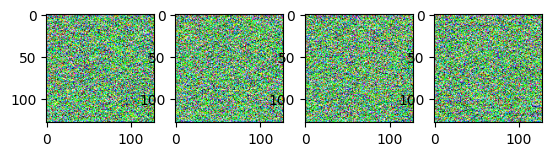

In [31]:
from matplotlib import pyplot as plt
print(sampled_images.shape)
#sampled_images = sampled_images.permute(0,1,3,2)
images = sampled_images.cpu().permute(0,2,3,1).numpy()
img1 = images[0]
img2 = images[1]
img3 = images[2]
img4 = images[3]
plt.subplot(1,4,1)
plt.imshow(img1)
plt.subplot(1,4,2)
plt.imshow(img2)
plt.subplot(1,4,3)
plt.imshow(img3)
plt.subplot(1,4,4)
plt.imshow(img4)

In [16]:
# from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

# model = Unet(
#     dim = 64,
#     dim_mults = (1, 2, 4, 8)
# ).cuda()

# diffusion = GaussianDiffusion(
#     model,
#     image_size = 128,
#     timesteps = 1000,   # number of steps
#     #loss_type = 'l1'    # L1 or L2
# ).cuda()

# trainer = Trainer(
#     diffusion,
#     'Baidu/people1',
#     train_batch_size = 32,
#     train_lr = 2e-5,
#     train_num_steps = 700000,         # total training steps
#     gradient_accumulate_every = 2,    # gradient accumulation steps
#     ema_decay = 0.995,                # exponential moving average decay
#     amp = True                        # turn on mixed precision
# )

# trainer.train()

# sampled_images = diffusion.sample(batch_size = 4)

# from matplotlib import pyplot as plt
# print(sampled_images.shape)
# #sampled_images = sampled_images.permute(0,2,3,1)
# images = sampled_images.cpu().numpy()
# img1 = images[0]
# img2 = images[1]
# img3 = images[2]
# img4 = images[3]
# plt.subplot(1,4,1)
# plt.imshow(img1)
# plt.subplot(1,4,2)
# plt.imshow(img2)
# plt.subplot(1,4,3)
# plt.imshow(img3)
# plt.subplot(1,4,4)
# plt.imshow(img4)

AssertionError: you should have at least 100 images in your folder. at least 10k images recommended